In [1]:
# Define paths to the dataset
train_dir = r'C:\Users\samer\OneDrive\Desktop\train'
test_dir = r'C:\Users\samer\OneDrive\Desktop\test'

In [2]:
import os

train_adults_path = r'C:\Users\samer\OneDrive\Desktop\train\adults'
train_children_path = r'C:\Users\samer\OneDrive\Desktop\train\children'
test_adults_path = r'C:\Users\samer\OneDrive\Desktop\test\adults'
test_children_path = r'C:\Users\samer\OneDrive\Desktop\test\children'

print(len(os.listdir(train_adults_path)))
print(len(os.listdir(train_children_path)))
print(len(os.listdir(test_adults_path)))
print(len(os.listdir(test_children_path)))


340
340
60
60


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)


Found 476 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [4]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [5]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [6]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.002),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [7]:
history = resnet_model.fit(train_data, epochs=6, validation_data=validation_data)

Epoch 1/6


15/15 [==============================] - 37s 2s/step - loss: 7.0030 - accuracy: 0.5084 - val_loss: 3.0966 - val_accuracy: 0.5000
Epoch 2/6
15/15 [==============================] - 31s 2s/step - loss: 1.4992 - accuracy: 0.5168 - val_loss: 1.4112 - val_accuracy: 0.5000
Epoch 3/6
15/15 [==============================] - 32s 2s/step - loss: 0.9742 - accuracy: 0.5105 - val_loss: 0.7754 - val_accuracy: 0.5000
Epoch 4/6
15/15 [==============================] - 30s 2s/step - loss: 0.6695 - accuracy: 0.6050 - val_loss: 0.6859 - val_accuracy: 0.5637
Epoch 5/6
15/15 [==============================] - 29s 2s/step - loss: 0.6296 - accuracy: 0.6239 - val_loss: 0.7633 - val_accuracy: 0.5000
Epoch 6/6
15/15 [==============================] - 29s 2s/step - loss: 0.6093 - accuracy: 0.6723 - val_loss: 0.6680 - val_accuracy: 0.5882


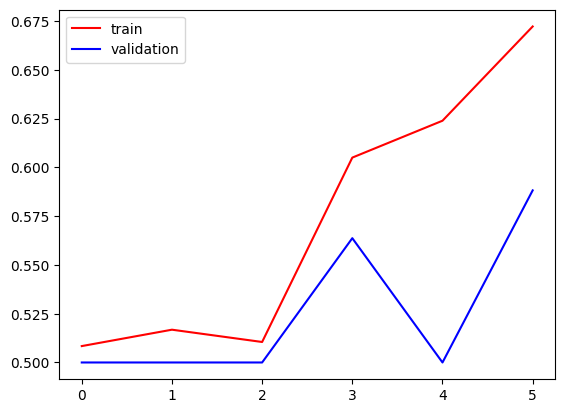

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

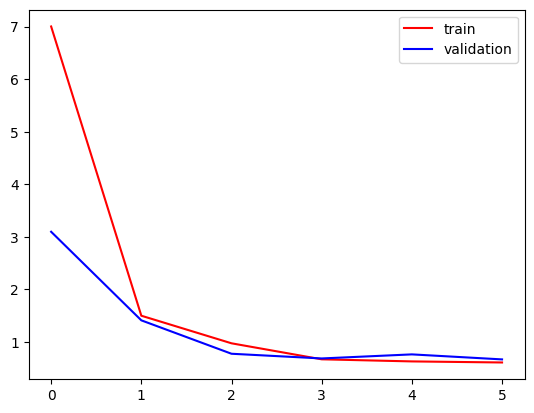

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [11]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 7s 1s/step
[[0.1798235 ]
 [0.39421836]
 [0.5406665 ]
 [0.33044666]
 [0.49677175]
 [0.4242947 ]
 [0.5169025 ]
 [0.47904226]
 [0.59126955]
 [0.5163934 ]
 [0.32644415]
 [0.49894562]
 [0.26851636]
 [0.5761788 ]
 [0.5558008 ]
 [0.60731554]
 [0.51255924]
 [0.5006187 ]
 [0.53506553]
 [0.42165405]
 [0.13866264]
 [0.47107017]
 [0.52280015]
 [0.615207  ]
 [0.43583837]
 [0.58162534]
 [0.5937713 ]
 [0.5374326 ]
 [0.47081465]
 [0.5630745 ]
 [0.50874376]
 [0.39268836]
 [0.5373881 ]
 [0.46823353]
 [0.769128  ]
 [0.52725244]
 [0.3969578 ]
 [0.48210087]
 [0.56031257]
 [0.41348502]
 [0.43290317]
 [0.3462155 ]
 [0.02536787]
 [0.56877446]
 [0.3735203 ]
 [0.65147144]
 [0.39566875]
 [0.10905647]
 [0.4940486 ]
 [0.37786987]
 [0.536553  ]
 [0.44939512]
 [0.45154575]
 [0.5748415 ]
 [0.50509596]
 [0.6327504 ]
 [0.62095475]
 [0.34184033]
 [0.22418734]
 [0.4738839 ]
 [0.55533135]
 [0.45573407]
 [0.45928445]
 [0.5245916 ]
 [0.42031038]
 [0.283571  ]
 [0.3005373 ]
 [0.5133522 

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[32 28]
 [28 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        60
           1       0.53      0.53      0.53        60

    accuracy                           0.53       120
   macro avg       0.53      0.53      0.53       120
weighted avg       0.53      0.53      0.53       120

